In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/dmaru.ext/ML_Project/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [9]:
# Missing Value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
# check Duplicate
df = df.drop_duplicates()

In [11]:
df.shape  # 1 duplicate removed

(1337, 7)

## Data Analysis

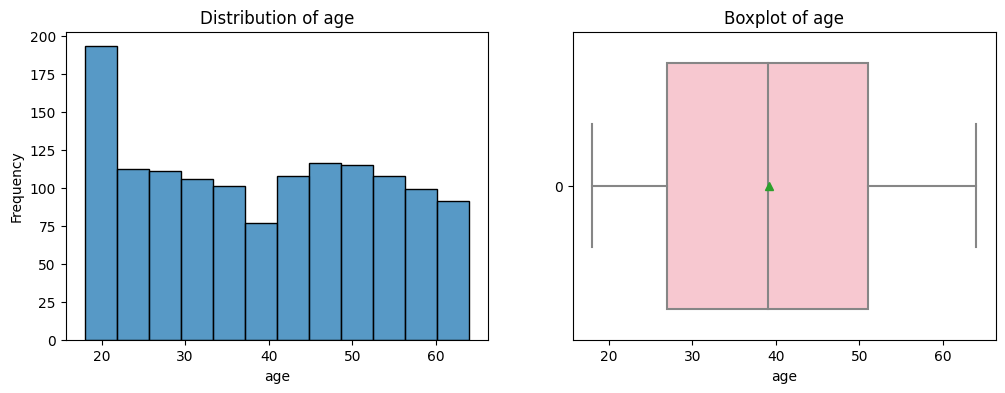

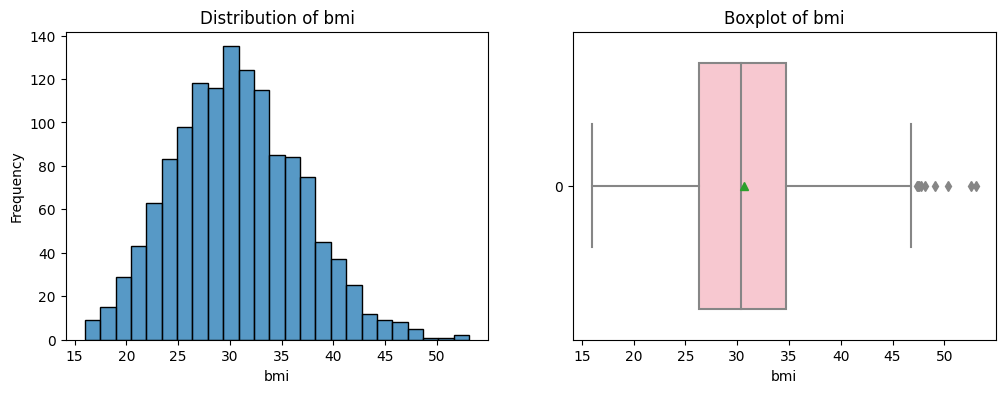

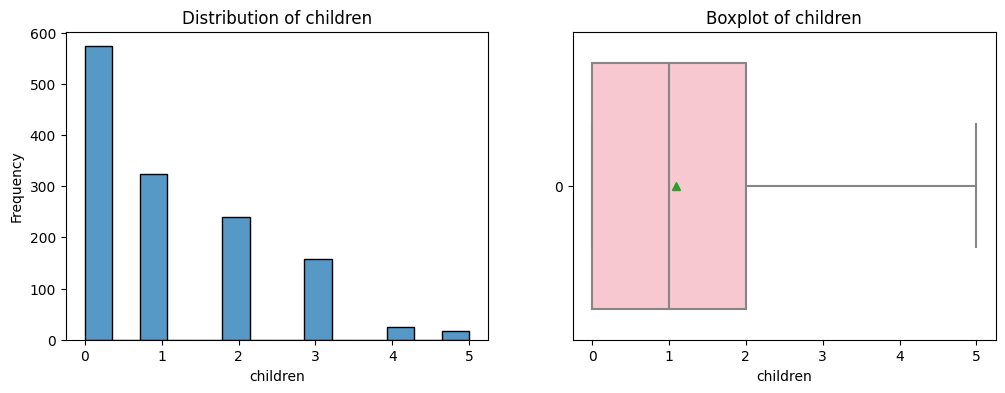

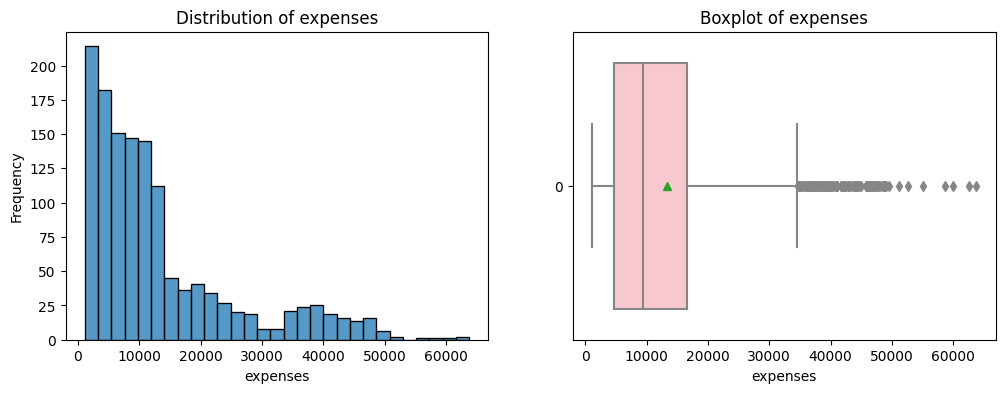

In [12]:
def create_subplot(x, df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[x], ax=axes[0], kde=False)
    sns.boxplot(df[x], ax=axes[1], orient="h", showmeans=True, color="pink")
    axes[0].set_title(f"Distribution of {x}")
    axes[0].set_xlabel(x)
    axes[0].set_ylabel("Frequency")
    axes[1].set_title(f"Boxplot of {x}")
    axes[1].set_xlabel(x)
    axes[1].set_ylabel("")

x_axis = ['age', 'bmi', 'children', 'expenses']

for x in x_axis:
    create_subplot(x, df)

### Handle Categorical Columns

In [13]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex']=df.sex.map({'female':0, 'male': 1})

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [16]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [17]:
df['smoker']=df.smoker.map({'yes':0, 'no': 1})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,southwest,16884.92
1,18,1,33.8,1,1,southeast,1725.55
2,28,1,33.0,3,1,southeast,4449.46
3,33,1,22.7,0,1,northwest,21984.47
4,32,1,28.9,0,1,northwest,3866.86


In [19]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df['region']=df.region.map({'southwest':1, 'southeast': 2, 'northwest':3, 'northeast':4 })

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,1,16884.92
1,18,1,33.8,1,1,2,1725.55
2,28,1,33.0,3,1,2,4449.46
3,33,1,22.7,0,1,3,21984.47
4,32,1,28.9,0,1,3,3866.86


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.9 KB


## Split the dataset in x and y

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [24]:
x = df.drop(['expenses'], axis=1)

In [25]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,0,1
1,18,1,33.8,1,1,2
2,28,1,33.0,3,1,2
3,33,1,22.7,0,1,3
4,32,1,28.9,0,1,3


In [26]:
y = df[['expenses']]

In [27]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [30]:
x_train.shape

(1069, 6)

In [31]:
x_test.shape

(268, 6)

In [32]:
y_train.shape

(1069, 1)

In [33]:
y_test.shape

(268, 1)

## Model Training

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [39]:
score1 #Checking Accuracy

0.8068280291899952

### Support Vector Regressor

In [40]:
from sklearn.svm import SVR

In [41]:
svm = SVR()

In [42]:
svm.fit(x_train, y_train)

c:\temp\softwares\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [43]:
y_pred = svm.predict(x_test)

In [44]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)

In [45]:
score1

-0.13444687731133387

### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [47]:
rf.fit(x_train, y_train)

C:\Users\dmaru.ext\AppData\Local\Temp\ipykernel_23220\3512478466.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [48]:
y_pred = rf.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
score3 = r2_score(y_test, y_pred)

In [50]:
score3

0.8811295292780551

#### Final Model Is Random Forest Regressor as it is having 88% Accuracy

In [51]:
rf.fit(x_train, y_train)

C:\Users\dmaru.ext\AppData\Local\Temp\ipykernel_23220\3512478466.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [52]:
data = {
    'age':19,
    'sex':0,
    'bmi':27.9,
    'children':0,
    'smoker': 0,
    'region': 1,
}

new_df = pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,0,1


In [53]:
pred = rf.predict(new_df)

In [54]:
pred[0]

17198.90009999999

In [55]:
### Saving Model
import joblib
joblib.dump(rf, 'random_forest_regressor')

['random_forest_regressor']